In [ ]:
# modules needed in this notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics.pairwise import pairwise_kernels


# Non-linear and Kernel PCA

## Introduction
Traditional PCA captures linear patterns between features. It fails at capturing non-linear patterns.

Alternatives for datasets that contain non-linear patterns:
* Kernel PCA
* Autoencoder PCA

## PCA vs Kernel PCA from a mathematical perspective

The **Kernel trick** consist in projecting the dataset into a higher dimensional space, with the ambition to make it linearly separable.

Starting from a dataset composed of $n$ samples $x$ and $d$ features $f$

| PCA | Kernel PCA |
|-----|------------|
| PCA conducted on the **feature covariance matrix** $\Sigma$ | PCA conducted on the **Kernel matrix** $K$ |
| $\Sigma_{ij} = \text{Cov}(f_i, f_j)$ | $K_{ij} = K(x_i, x_j)$ |
| $\Sigma_{ij}$ measures the **covariance** of two features $f$ | $K_{ij}$ measures the **similarity** between two samples $x$  |
| $\Sigma \in \mathbb{R}^{d \times d}$ &rarr; up to $d$ principal components | $K \in \mathbb{R}^{n \times n}$ &rarr; up to $n$ principal components|



## What are kernel functions $K(x_i, x_j)$?


Kernel functions are non linear functions measuring the **similarity** between two samples $X$ and $Y$ of dimension $d$.

Examples of Kernel functions:
* Linear kernel: $K(X, Y) = X^T Y $

* Cosine similarity: $K(X, Y) = \frac{X^T Y}{||X||*||Y||} $

* Polynomial kernel: $K(X, Y) = (\gamma X^T Y  + coef_0) ^{degree}$

* Sigmoid kernel: $K(X, Y) = tanh(\gamma X^T Y  + coef_0)$

* Gaussian RBF kernel: $K(x, y) = exp(-\gamma ||x-y||^2)$

* Laplacian kernel: $K(x, y) = exp(-\gamma ||x-y||_1)$

* Chi-squared kernel: $K(x, y) = exp(-\gamma \sum [\frac{(x - y)^2}{(x + y)}])$



### Illustration of Kernel functions in 1 dimension



In [ ]:
# Define the range of x values and the reference point
x_values = np.linspace(-5, 5, 400).reshape(-1, 1)
x_discrete = np.array([-2,-1.8, -1.7, -1.5, -1.3,-1.2, -1, 1.3,1.4,1.7, 1.9, 2, 2.3]).reshape(-1, 1)
reference_point = np.array([[2]])

# Define the list of kernels to evaluate
kernels = ['rbf', 'sigmoid', 'cosine', 'laplacian', 'linear', 'polynomial']
kernel_results = {}
kernel_discrete = {}

# Compute kernel similarities
for kernel in kernels:
    if kernel == 'polynomial':
        sim = pairwise_kernels(x_values, reference_point, metric=kernel, gamma=0.2, coef0=0.5, degree=3)
        sim_discrete = pairwise_kernels(x_discrete, reference_point, metric=kernel, gamma=0.2, coef0=0.5, degree=3)
    elif kernel == 'sigmoid':
        sim = pairwise_kernels(x_values, reference_point, metric=kernel, gamma=0.5, coef0=1)
        sim_discrete = pairwise_kernels(x_discrete, reference_point, metric=kernel, gamma=0.5, coef0=1)
    elif kernel in ['rbf', 'laplacian']:
        sim = pairwise_kernels(x_values, reference_point, metric=kernel, gamma=0.5)
        sim_discrete = pairwise_kernels(x_discrete, reference_point, metric=kernel, gamma=0.5)
    else:
        sim = pairwise_kernels(x_values, reference_point, metric=kernel)
        sim_discrete = pairwise_kernels(x_discrete, reference_point, metric=kernel)
    kernel_results[kernel] = sim.ravel()
    kernel_discrete[kernel] = sim_discrete.ravel()

euclidean_distance = np.linalg.norm(x_values - reference_point, axis=1)

def compare_kernels(list_of_kernels, discrete=False):
  # Plot the results
  plt.figure(figsize=(10, 6))
  plt.plot(x_values, euclidean_distance, label='euclidean distance', color='black', linestyle='--')
  for kernel in list_of_kernels:
      plt.plot(x_values, kernel_results[kernel], label=kernel)
      if discrete:
        plt.plot(x_discrete, x_discrete*0 , 'o', label='1D data')
        plt.plot(x_discrete, kernel_discrete[kernel], 'o', label='2D data')

  # Add red dot at x=2 with a tag "Reference point"
  plt.scatter([2], [0], color='red', zorder=7)
  plt.text(2, -0.25, 'Reference point', color='red', ha='center', fontsize=12)

  # Add plot details
  plt.title("Kernel Similarity vs Euclidian distance - 1D example")
  plt.xlabel("x", fontsize=12)
  plt.ylabel("Kernel Similarity / Euclidian distance (---)", fontsize=12)
  plt.ylim(-2.1, 2.1)
  plt.axhline(y=0, color='black', linewidth=2)  # x-axis at y=0
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.legend(fontsize=10)
  plt.grid(True)
  plt.tight_layout()




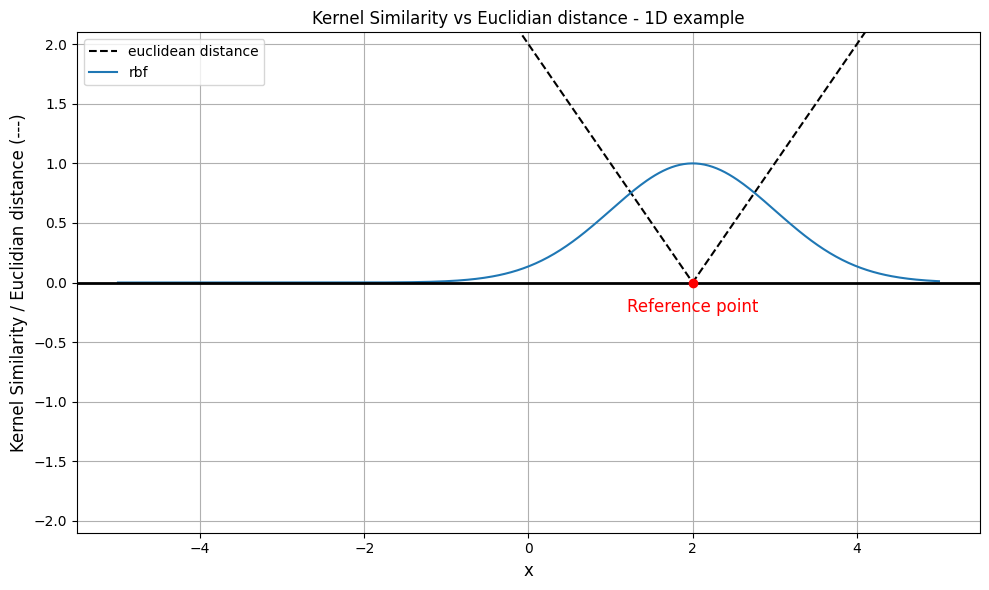

In [ ]:
# We measure the similarity between a point x=2 and other x values between -5 and 5, using different Kernel functions.
compare_kernels(['rbf'])

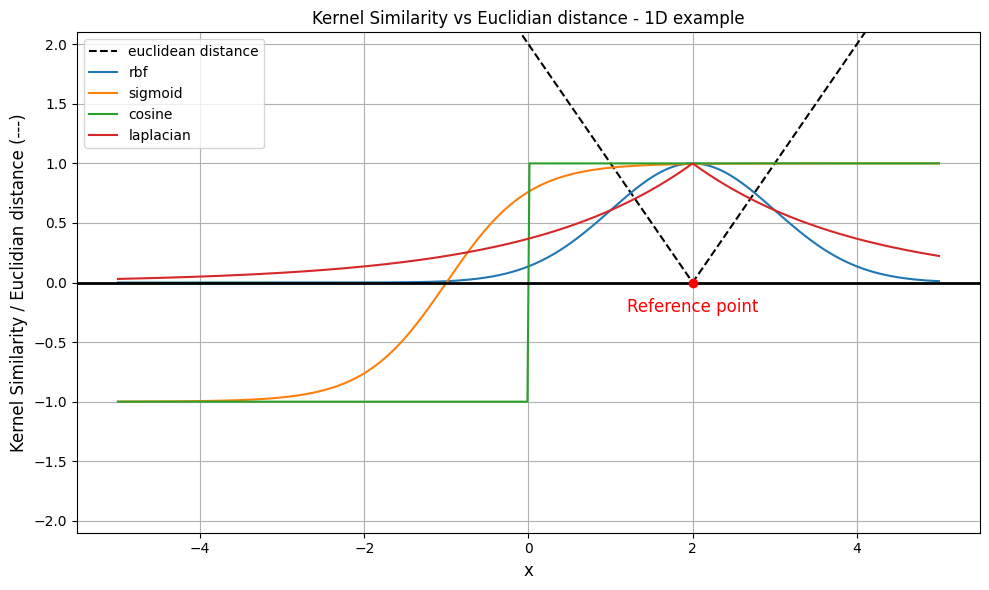

In [ ]:
# We measure the similarity between a point x=2 and other x values between -5 and 5, using different Kernel functions.
compare_kernels(['rbf', 'sigmoid', 'cosine', 'laplacian'])

# Note: the cosine kernel measures the angle between two vectors. In 1D, the angle is either 0 or 180 deg.

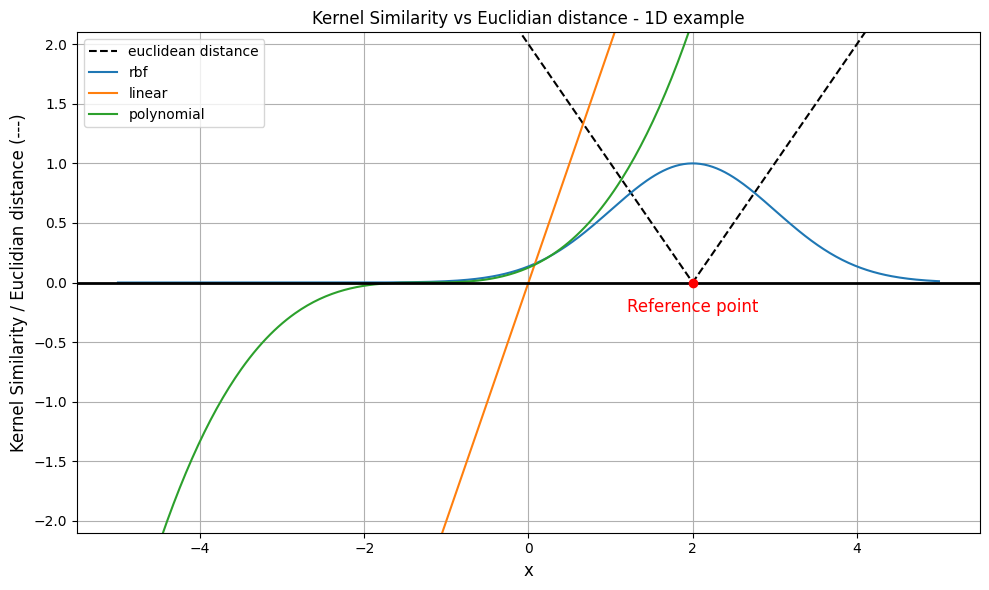

In [ ]:
# We measure the similarity between a point x=2 and other x values between -5 and 5, using different Kernel functions.
compare_kernels(['rbf', 'linear', 'polynomial'])

## Kernel PCA for classification
- Group points into linearly seperable clusters
- Utilising non-linearity of kernels to seperate clusters

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

explained_var = pca.explained_variance_ratio_

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X)

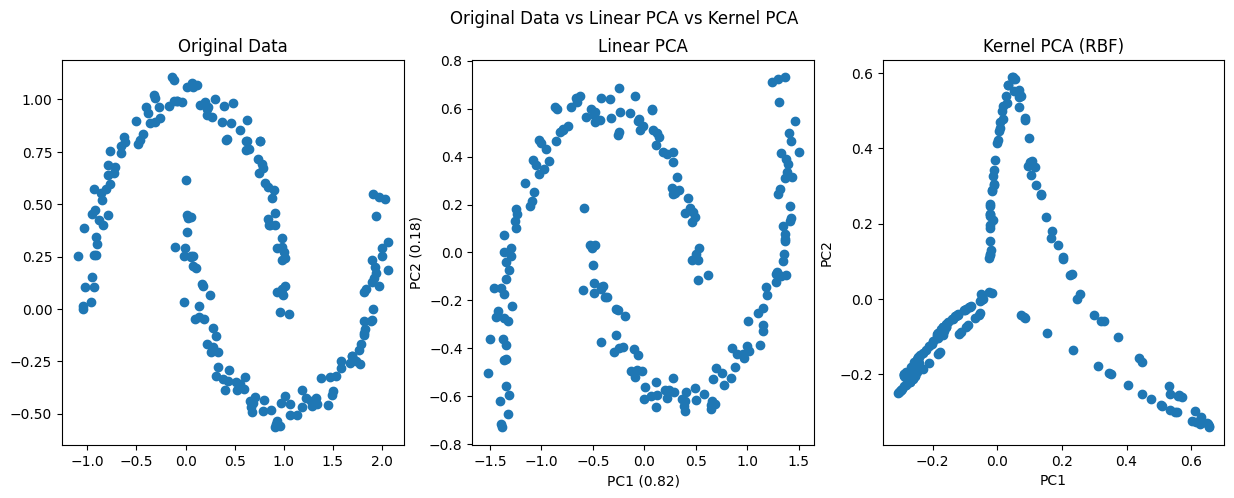

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].scatter(X[:,0], X[:,1])
axes[0].set_title("Original Data")

axes[1].scatter(X_pca[:,0], X_pca[:,1])
axes[1].set_title("Linear PCA")
axes[1].set_xlabel(f"PC1 ({explained_var[0]:.2f})")
axes[1].set_ylabel(f"PC2 ({explained_var[1]:.2f})")

axes[2].scatter(X_kpca[:,0], X_kpca[:,1])
axes[2].set_title("Kernel PCA (RBF)")
axes[2].set_xlabel(f"PC1")
axes[2].set_ylabel(f"PC2")

plt.suptitle("Original Data vs Linear PCA vs Kernel PCA")
plt.show()

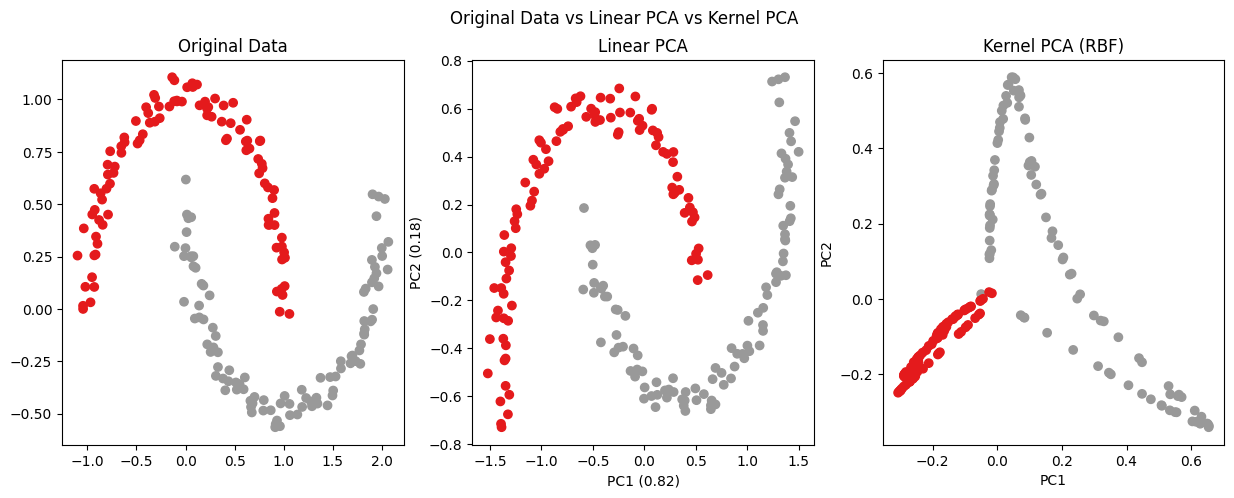

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1)
axes[0].set_title("Original Data")

axes[1].scatter(X_pca[:,0], X_pca[:,1], c=y, cmap=plt.cm.Set1)
axes[1].set_title("Linear PCA")
axes[1].set_xlabel(f"PC1 ({explained_var[0]:.2f})")
axes[1].set_ylabel(f"PC2 ({explained_var[1]:.2f})")

axes[2].scatter(X_kpca[:,0], X_kpca[:,1], c=y, cmap=plt.cm.Set1)
axes[2].set_title("Kernel PCA (RBF)")
axes[2].set_xlabel(f"PC1")
axes[2].set_ylabel(f"PC2")

plt.suptitle("Original Data vs Linear PCA vs Kernel PCA")
plt.show()

## Measuring the captured variance of your (kernel) PCA

**Explained Variance Ratio (Linear PCA):**
  - Fraction of dataset variance preserved in each PC.
  - Cumulative variance can guide number of components to keep.


**Kernel PCA:**
  - No direct explained variance ratio (non-linear mapping).

**Reconstruction Error:**
  - Project data back to input space (if possible) and measure error.
  - Useful for Kernel PCA with `fit_inverse_transform=True`.

**Downstream Task Performance:**
  - Train a classifier/regressor on reduced features and compare accuracy.
  - Good way to measure if information is preserved.


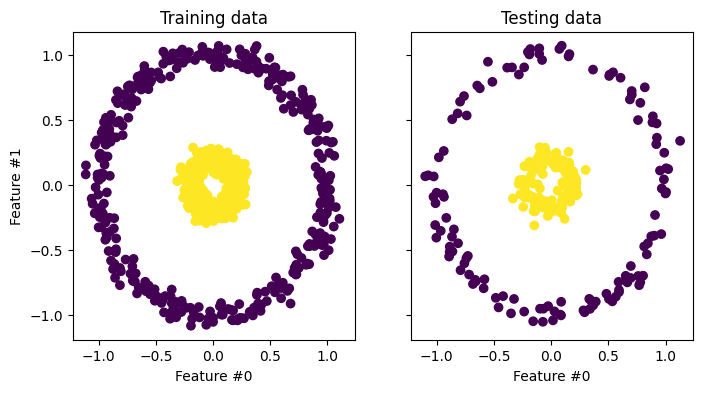

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# generate and plot a 2D non linear dataset (two concentric circles) with noise
X_nlin, y = make_circles(n_samples=1000, noise=0.05, factor=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_nlin, y, stratify=y, random_state=0)

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

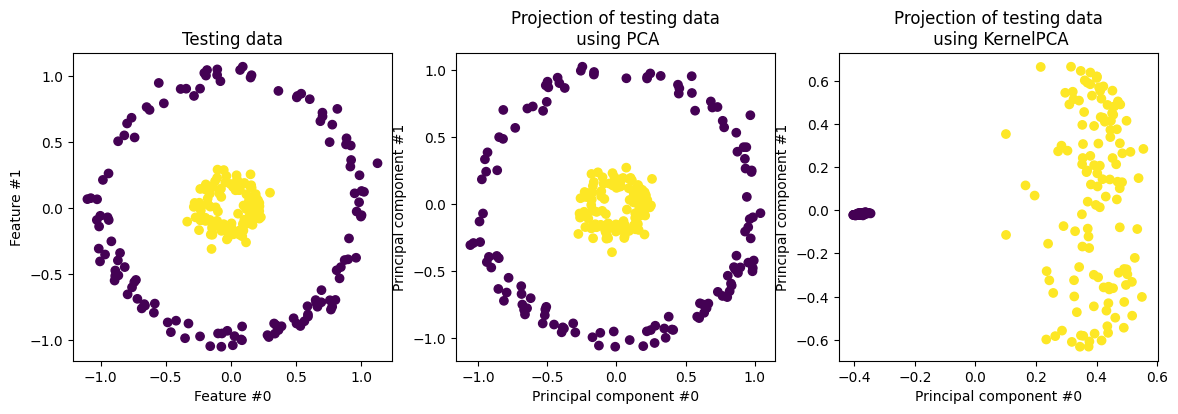

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(kernel="rbf", gamma=10, fit_inverse_transform=True
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)


fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

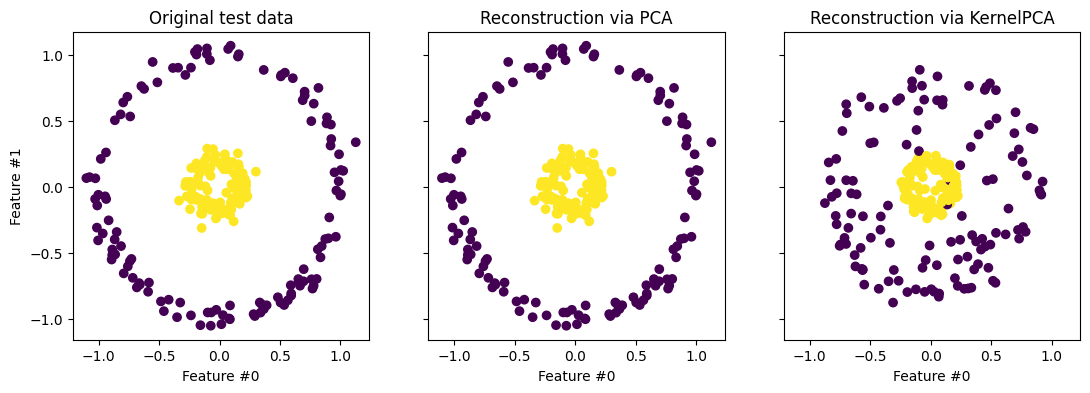

In [ ]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

## Autoencoder Nonlinear PCA

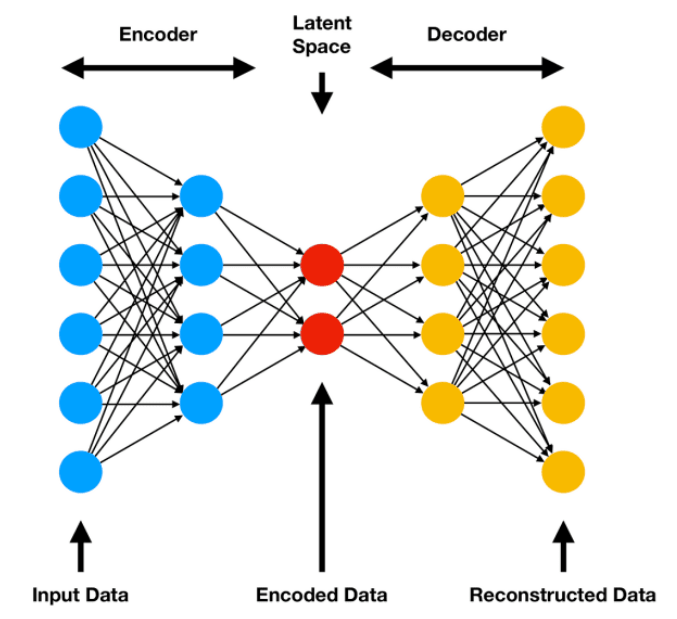

### Swiss Roll

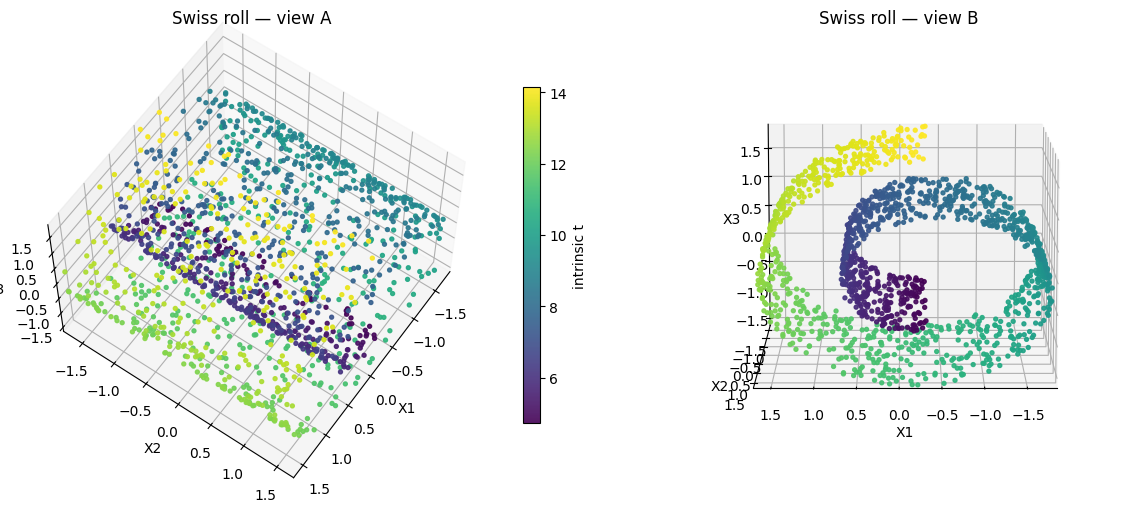

In [ ]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
import torch, torch.nn as nn, torch.optim as optim

torch.manual_seed(10)
X, t = make_swiss_roll(n_samples=1500, noise=0.05, random_state=0)
X = StandardScaler().fit_transform(X).astype("float32")

# --- helper to make cubic limits so shapes don't look squashed
mins, maxs = X.min(axis=0), X.max(axis=0)
center = (mins + maxs) / 2
radius = (maxs - mins).max() / 2

fig, axes = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={"projection": "3d"})

# View A
sc0 = axes[0].scatter(X[:, 0], X[:, 1], X[:, 2], c=t, s=8, alpha=0.9)
axes[0].set_title("Swiss roll — view A")
axes[0].set_xlabel("X1"); axes[0].set_ylabel("X2"); axes[0].set_zlabel("X3")
axes[0].view_init(elev=60, azim=35)

# View B
sc1 = axes[1].scatter(X[:, 0], X[:, 1], X[:, 2], c=t, s=8, alpha=0.9)
axes[1].set_title("Swiss roll — view B")
axes[1].set_xlabel("X1"); axes[1].set_ylabel("X2"); axes[1].set_zlabel("X3")
axes[1].view_init(elev=10, azim=90)

# Keep the same color scale on both
vmin, vmax = t.min(), t.max()
for sc in (sc0, sc1):
    sc.set_clim(vmin, vmax)

# Equalize axis limits and add a shared colorbar
for ax in axes:
    ax.set_xlim(center[0]-radius, center[0]+radius)
    ax.set_ylim(center[1]-radius, center[1]+radius)
    ax.set_zlim(center[2]-radius, center[2]+radius)

fig.colorbar(sc0, shrink=0.75, pad=0.08, label="intrinsic t")
plt.tight_layout()
plt.show()

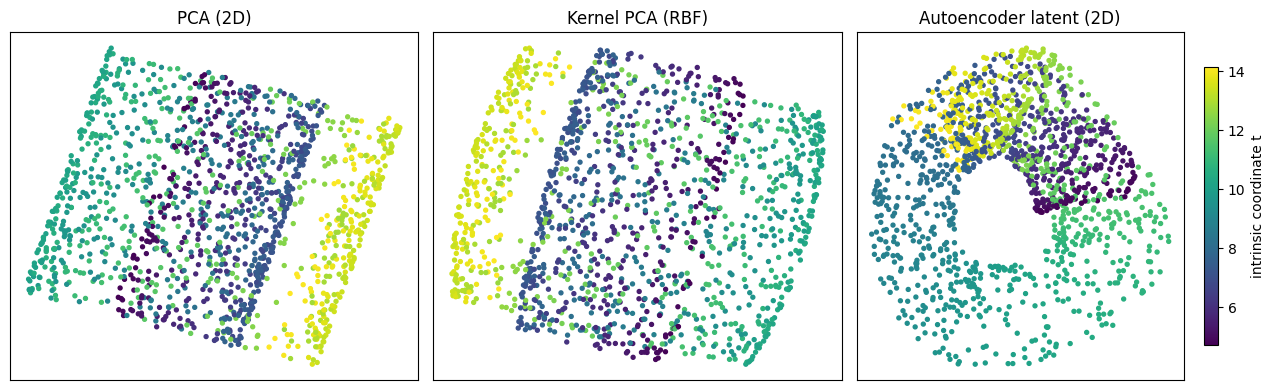

In [ ]:
pca2 = PCA(n_components=2).fit(X)
x_pca2 = pca2.transform(X)
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.05)
x_kpca = kpca.fit_transform(X)

Xt = torch.from_numpy(X)
class AE2(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc = nn.Sequential(nn.Linear(3, 64), nn.ReLU(), nn.Linear(64, 2))
        self.dec = nn.Sequential(nn.Linear(2, 64), nn.ReLU(), nn.Linear(64, 3))
    def forward(self, x): z = self.enc(x); return self.dec(z), z

ae = AE2(); opt = optim.Adam(ae.parameters(), lr=1e-3); loss = nn.MSELoss()
for _ in range(800):
    opt.zero_grad(); xhat, _ = ae(Xt); l = loss(xhat, Xt); l.backward(); opt.step()

with torch.no_grad(): _, z = ae(Xt)
z = z.numpy()

fig, ax = plt.subplots(1, 3, figsize=(13,4))
for i,(E,title) in enumerate([(x_pca2,"PCA (2D)"),
                              (x_kpca,"Kernel PCA (RBF)"),
                              (z,"Autoencoder latent (2D)")]):
    sc = ax[i].scatter(E[:,0], E[:,1], c=t, s=8)
    ax[i].set_title(title); ax[i].set_xticks([]); ax[i].set_yticks([])
fig.colorbar(sc, shrink=0.8, label="intrinsic coordinate t")
plt.tight_layout(); plt.show()

## Discussion
### Advantages
* **Non-linearity**: Kernel PCA can capture non-linear patterns in the data that are not possible with traditional linear PCA.
* **Versatility**: Different types of kernel functions can be used in kernel PCA to suit different types of data and different objectives.
* **Robustness**: Kernel PCA can be more robust to outliers and noise in the data, as it considers the global structure of the data, rather than just local distances between data points.
* It is a well-established and widely used technique in machine learning, with many available libraries and resources for implementation.

### Diadvantages
* **Complexity**: Kernel PCA can be computationally expensive, especially for large datasets, as it requires the calculation of eigenvectors and eigenvalues.
* **Model selection**: Choosing the right kernel function, the right parameters and the right number of components can be challenging and requires trial and error
* **Interpretability**: It may not always be easy to interpret the results of kernel PCA, as the transformed data may not have a clear interpretation in the original feature space.


## References



Kernel functions:
* https://scikit-learn.org/stable/modules/metrics.html

Kernel PCA:
* https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html

